In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'gray'
import numpy as np
import cv2 as cv
from pathlib import Path
import pandas as pd
# pd.set_option("display.max_colwidth", -1)
import plot_utils as plot
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
COLOR_RED = (255, 0, 0)
COLOR_GREEN = (0, 255, 0)
COLOR_BLUE = (0, 0, 255)

PADDING_X = 150
PADDING_Y = 300

def read_image(path):
    return cv.imread(str(path), cv.IMREAD_COLOR)

def plot_square(img, center, size):
    copy = img.copy()
    x, y = center
    half = size // 2
    top_left = (x-half, y-half)
    bottom_right = (x+half, y+half)
    cv.rectangle(copy, top_left, bottom_right, COLOR_GREEN, 3)
    cv.line(copy, (x-150, 600), (x+150, 600), COLOR_BLUE, 5)
    return copy

def get_crops(img, size, start, offset, step_size):
    start_x, start_y = start
    offset_x, offset_y = offset
    steps_x = offset_x // step_size
    steps_y = offset_y // step_size
    y, x = img.shape[:2]
    
    if start_x + size + offset_x > x or start_y + size + offset_y > y:
        print('Crop will overflow image')
        return np.array([])
    
    crops = []
    for step_x in range(steps_x):
        for step_y in range(steps_y):
            start_crop_y = start_y + step_y * step_size
            end_crop_y = start_crop_y + size
            start_crop_x = start_x + step_x * step_size
            end_crop_x  = start_crop_x + size
            crop = img[start_crop_y:end_crop_y, start_crop_x:end_crop_x]
            crops.append(crop)
    return crops

def get_center(img):
    y, x = img.shape[:2]
    return x // 2, y // 2


Figure(604.8x504)


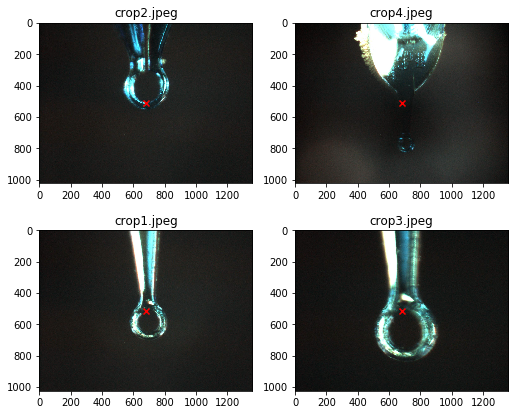

In [7]:
BASE_DIR = Path('/data/staff/common/ML-crystals/classification')
crop_bases = [(read_image(fp), fp.name) for fp in BASE_DIR.glob('crop*.jpeg')]
images, titles = zip(*crop_bases)
fig = plot.image_grid(images ,titles, max_cols=2)
fig.savefig('classification_empty.png')
print(fig)

In [6]:
from itertools import chain
from PIL import Image
params = {'crop2.jpeg': (600, (200, 0), (400, 400), 10),
         'crop1.jpeg': (600, (200, 100), (400, 300), 10),
         'crop3.jpeg': (600, (200, 0), (400, 400), 10),
         'crop4.jpeg': (400, (400, 400), (300, 220), 10)}

crops = list(chain(*[get_crops(img, *params[title]) for img, title in crop_bases]))
images = map(lambda img: cv.resize(cv.cvtColor(img, cv.COLOR_BGR2GRAY), (128, 128)), crops)

for idx, img in enumerate(images):
    Image.fromarray(img, mode='L').save(f"{BASE_DIR}/empty/{str(idx).zfill(4)}.jpeg")

In [ ]:
a = get_crops(images)